In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [3]:
df_raw = pd.read_csv('lending_club_loan_two.csv')

In [4]:
df_raw.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Preprocessing


In [6]:
df = df_raw.copy()

In [7]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

<Axes: xlabel='term', ylabel='count'>

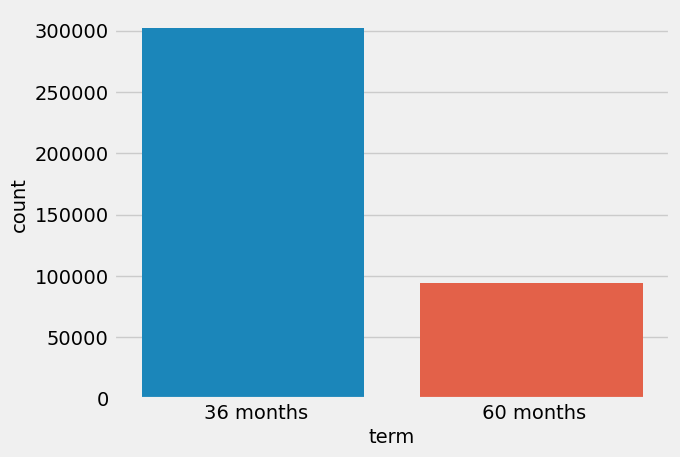

In [8]:
sns.countplot(x = 'term', data = df)

In [9]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [10]:
df['term'].dtype

dtype('int64')

<Axes: xlabel='grade', ylabel='count'>

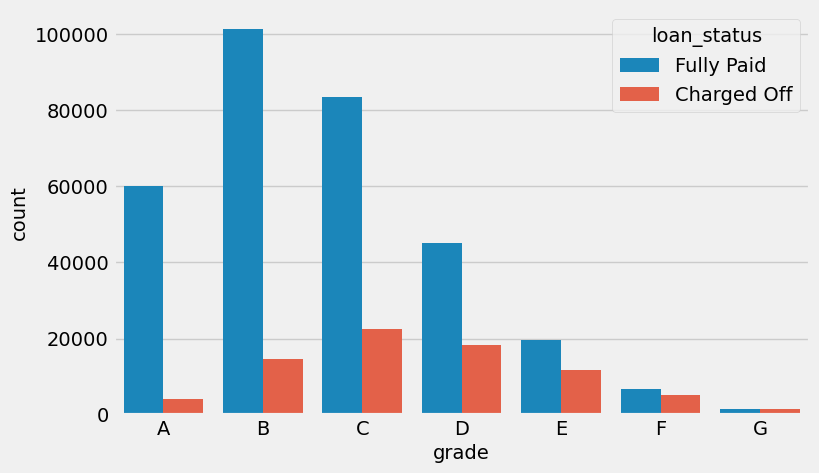

In [11]:
grade_order = sorted(df['grade'].unique())
plt.figure(figsize = (8,5))
sns.countplot(x = 'grade', data = df, order = grade_order, hue = 'loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

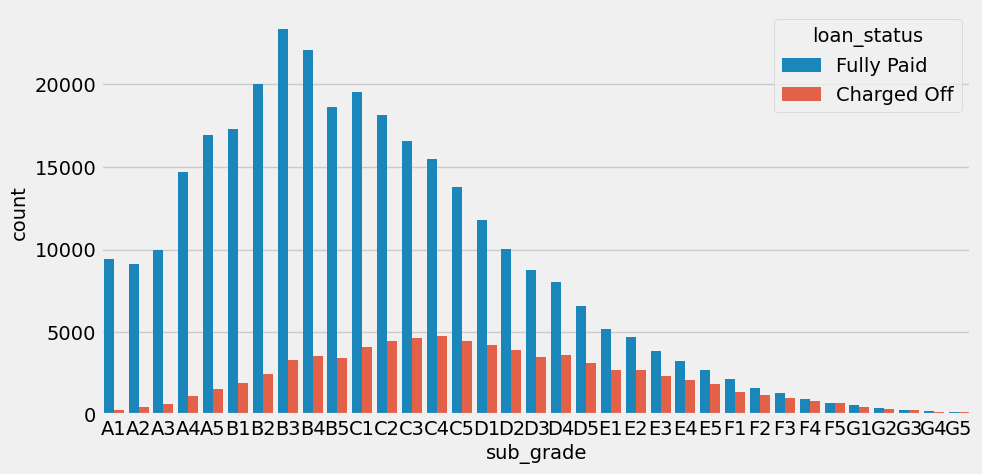

In [12]:
sub_grade_order = sorted(df['sub_grade'].unique())
plt.figure(figsize = (10,5))
sns.countplot(x = 'sub_grade', data = df, order = sub_grade_order, hue = 'loan_status')

In [13]:
df.drop('grade', axis = 1, inplace = True)

In [14]:
df['emp_title'].nunique()

173105

In [15]:
df.drop('emp_title', axis = 1, inplace = True)

In [16]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [17]:
df.corr(numeric_only = True)['mort_acc']

loan_amnt               0.222315
term                    0.096220
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Name: mort_acc, dtype: float64

<Axes: >

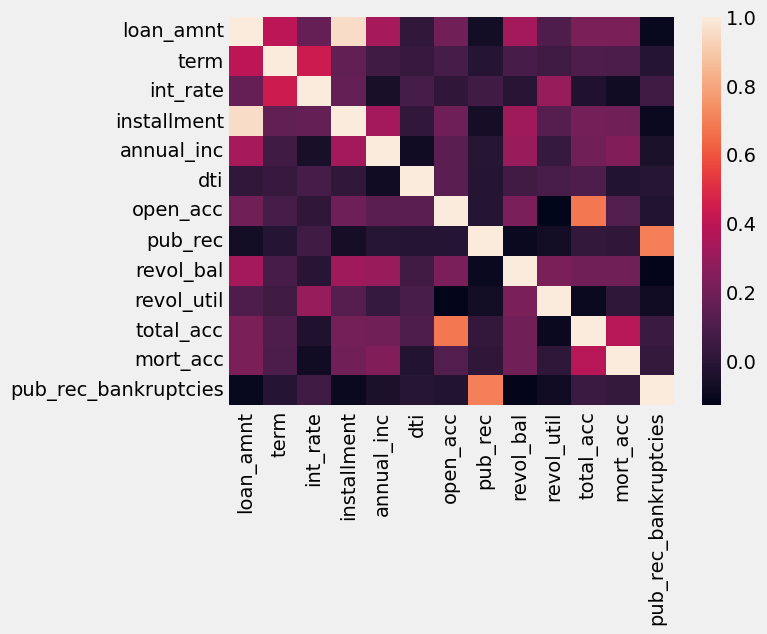

In [18]:
sns.heatmap(df.corr(numeric_only = True))

In [19]:
mean = df.groupby('total_acc')['mort_acc'].mean()

def mort_acc_fill(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mean[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: mort_acc_fill(x['total_acc'], x['mort_acc']), axis = 1)

In [20]:
df[['purpose', 'title']]

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards
396028,debt_consolidation,Loanforpayoff


In [21]:
df.drop('title', axis = 1, inplace = True)

In [22]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [23]:
df.drop('earliest_cr_line', axis = 1, inplace = True)

In [24]:
df['zip_code'] = df['address'].apply(lambda x: int(x[-5:]))

In [25]:
df.drop('address', axis = 1, inplace = True)

In [26]:
df.drop('issue_d', axis = 1, inplace = True)

In [27]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
earliest_cr_year        0.000000
zip_code                0.000000
dtype: float64

In [28]:
df.dropna(inplace = True)

In [29]:
df.select_dtypes('object').columns

Index(['sub_grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'initial_list_status', 'application_type'],
      dtype='object')

In [30]:
for col in df.select_dtypes('object').columns:
    print(f'{col}: {df[col].unique()} \n')

sub_grade: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3'] 

emp_length: ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year'] 

home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE'] 

verification_status: ['Not Verified' 'Source Verified' 'Verified'] 

loan_status: ['Fully Paid' 'Charged Off'] 

purpose: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy'] 

initial_list_status: ['w' 'f'] 

application_type: ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY'] 



In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
for col in df.select_dtypes('object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col}: {df[col].unique()} \n')

sub_grade: [ 8  9  7  1 14 12  0  6 10  4 23  3  2 15 11  5 17 19 16 20 21 24 28 22
 18 30 29 31 13 25 27 34 33 26 32] 

emp_length: [ 1  4 10  6  9  2  3  8  7  5  0] 

home_ownership: [5 1 4 3 0 2] 

verification_status: [0 1 2] 

loan_status: [1 0] 

purpose: [12  2  1  4 11  6  9  7 13  0  8  5  3 10] 

initial_list_status: [1 0] 

application_type: [1 2 0] 



<Axes: xlabel='loan_status', ylabel='count'>

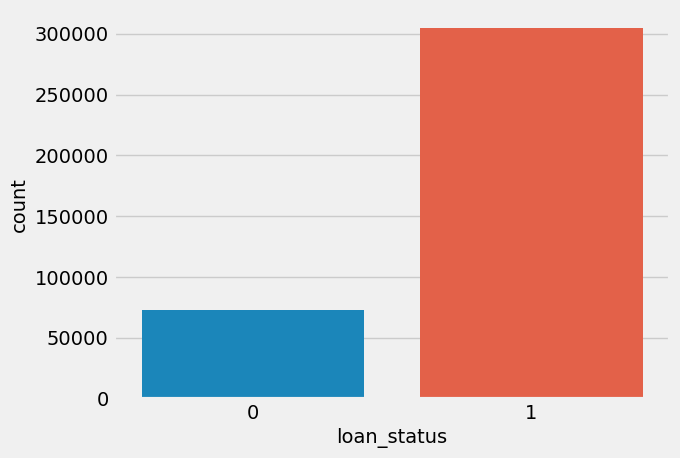

In [33]:
sns.countplot(x = 'loan_status', data = df)

In [34]:
df = df.rename(columns = {'loan_status' : 'Fully_Paid'})

### Prediction Model Creation Keras

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop('Fully_Paid', axis = 1)
y = df['Fully_Paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled.shape

(301543, 22)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
model = Sequential()

model.add(Dense(64, input_shape = (None, 22), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
earlystop = EarlyStopping(monitor='val_loss', patience = 5)

model.fit(X_train_scaled, y_train, epochs = 25, validation_data = (X_test_scaled, y_test), batch_size = 256, callbacks = [earlystop])

Epoch 1/25
1178/1178 [==============================] - 6s 4ms/step - loss: 0.4132 - accuracy: 0.8386 - val_loss: 0.3582 - val_accuracy: 0.8626
Epoch 2/25
1178/1178 [==============================] - 5s 4ms/step - loss: 0.3600 - accuracy: 0.8612 - val_loss: 0.3291 - val_accuracy: 0.8629
Epoch 3/25
1178/1178 [==============================] - 5s 4ms/step - loss: 0.3362 - accuracy: 0.8620 - val_loss: 0.3142 - val_accuracy: 0.8630
Epoch 4/25
1178/1178 [==============================] - 4s 4ms/step - loss: 0.3261 - accuracy: 0.8643 - val_loss: 0.2932 - val_accuracy: 0.8829
Epoch 5/25
1178/1178 [==============================] - 4s 4ms/step - loss: 0.3011 - accuracy: 0.8799 - val_loss: 0.2728 - val_accuracy: 0.8907
Epoch 6/25
1178/1178 [==============================] - 5s 4ms/step - loss: 0.2846 - accuracy: 0.8874 - val_loss: 0.2722 - val_accuracy: 0.8910
Epoch 7/25
1178/1178 [==============================] - 4s 4ms/step - loss: 0.2806 - accuracy: 0.8884 - val_loss: 0.2706 - val_accuracy:

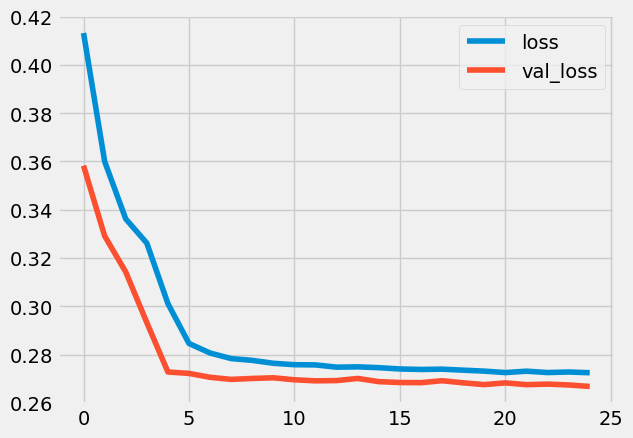

In [43]:
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()

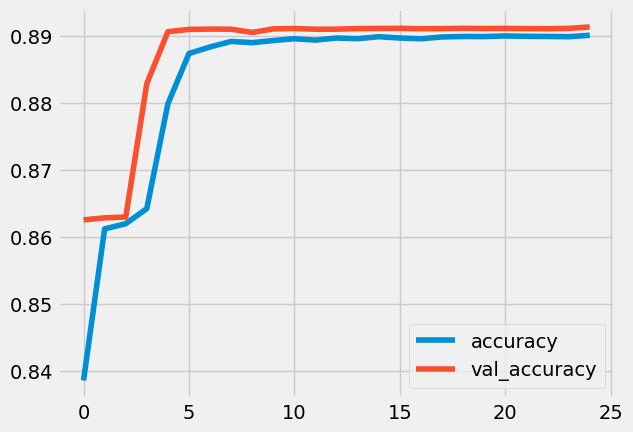

In [44]:
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

### Evaluation

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
predict_x = model.predict(X_test_scaled)
y_pred = np.round(predict_x).astype(int)

2356/2356 [==============================] - 4s 2ms/step


In [47]:
print('Deep Learning:')
print('    Classification Report: \n', classification_report(y_test, y_pred))
print('    Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Deep Learning:
    Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.43      0.60     14417
           1       0.88      1.00      0.94     60969

    accuracy                           0.89     75386
   macro avg       0.94      0.72      0.77     75386
weighted avg       0.90      0.89      0.87     75386

    Confusion Matrix: 
 [[ 6260  8157]
 [   33 60936]]


### Model Creation using Scikit Learn

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
print('Logistic Regression:')
print('    Classification Report: \n', classification_report(y_test, lr.predict(X_test)))
print('    Confusion Matrix: \n', confusion_matrix(y_test, lr.predict(X_test)))
print('\n')

print('Decision Tree:')
print('    Classification Report: \n', classification_report(y_test, dtree.predict(X_test)))
print('    Confusion Matrix: \n', confusion_matrix(y_test, dtree.predict(X_test)))
print('\n')

Logistic Regression:
    Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.26      0.39     14417
           1       0.85      0.98      0.91     60969

    accuracy                           0.84     75386
   macro avg       0.79      0.62      0.65     75386
weighted avg       0.83      0.84      0.81     75386

    Confusion Matrix: 
 [[ 3790 10627]
 [ 1409 59560]]


Decision Tree:
    Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.60      0.58     14417
           1       0.90      0.89      0.90     60969

    accuracy                           0.83     75386
   macro avg       0.73      0.74      0.74     75386
weighted avg       0.84      0.83      0.84     75386

    Confusion Matrix: 
 [[ 8638  5779]
 [ 6706 54263]]




### Feature Importances

In [52]:
df_imp = pd.DataFrame({'Feature Name': X_train.columns,
                      'Importance': dtree.feature_importances_ })

In [53]:
df_imp = df_imp.sort_values(by = 'Importance', ascending = False). head(10)

Text(0.5, 1.0, 'Feature Importance of \n Each Attribute (Decision Tree)')

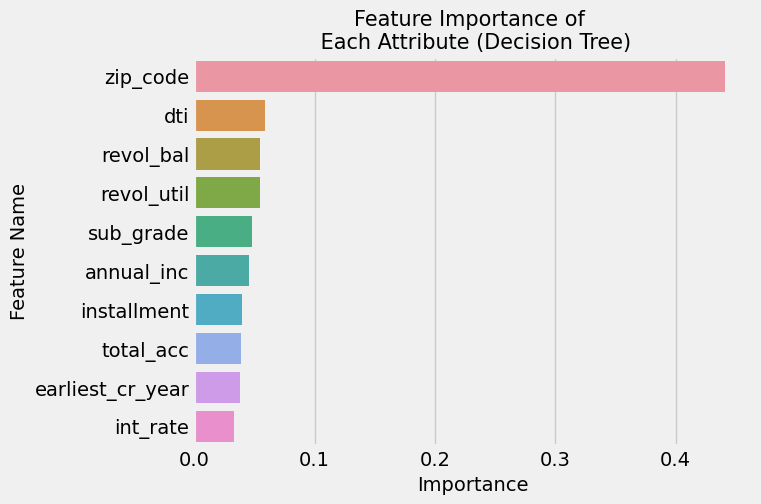

In [54]:
sns.barplot(x = 'Importance', y = 'Feature Name', data = df_imp)
plt.title('Feature Importance of \n Each Attribute (Decision Tree)', fontsize = 15)